dataset cleaning version : 1


In [64]:
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

# Theme Analysis


In [65]:
df = pd.read_csv('Data.csv')
df["Thème"] = df["Thème"].apply(lambda x: unidecode(x.lower()))
#df["Thème"] = df["Thème"].str.replace(" ", "", regex=False)
df["Thème"] = df["Thème"].str.strip()
df["Thème"] = df["Thème"].str.replace("clients", "client", regex=False)
df["Thème"] = df["Thème"].str.replace("cleints", "client", regex=False)
df["Thème"] = df["Thème"].str.replace("partenariats industriels / academiques", "partenariats industriels/academiques", regex=False)
df["Thème"] = df["Thème"].str.replace("rh - partenariat - rse", "rh/partenariat/rse", regex=False)
df["Thème"] = df["Thème"].str.replace("aleas climatique", "aleas climatiques", regex=False)
df["Thème"] = df["Thème"].str.replace("aleas climatiquess", "aleas climatiques", regex=False)
df["Thème"] = df["Thème"].str.replace("marque employeur / rh", "marque employeur/rh", regex=False)
df.head()

,Date,Territoire,Sujet,Thème,Nbre d'article,Qualité du retour,Média,Articles,Qualité du retour2,Tonalité
0,01/02/2023,Pas-de-Calais,Une maison à l'abandon détruite dans un incendie,divers,2.0,Factuel,La voix du Nord,Une maison à l'abandon détruite dans un incend...,Factuel,factuel
1,01/02/2023,Pas-de-Calais,Trois familles relogés après un court-circuit,divers,1.0,Factuel,La voix du Nord,Trois familles relogées après un court-circuit...,Factuel,factuel
2,01/02/2023,Nord,"Suite à une panne, 179 foyers privés de courant",reseau,1.0,Factuel négatif,La voix du Nord,"Suite à une panne, 179 foyers privés de couran...",Factuel négatif,factuel négatif
3,01/02/2023,Pas-de-Calais,"Plus de coupures d'éléctricté, mais des dégâts...",reseau,2.0,Négatif,La voix du Nord,"Plus de coupures d'électricité, mais des dégât...",Négatif,négatif
4,01/02/2023,Pas-de-Calais,Les décharges remplacés par deux centrales pho...,transition ecologique,1.0,Factuel,La voix du Nord,les décharges remplacées par deux centrales\r...,Factuel,factuel


In [66]:
# Dictionnaire de remplacement avec tous les cas manquants
replace_dict = {
    'nord pas-de-calais': 'Hauts-de-France',
    'nord pas-de-calais ': 'Hauts-de-France',
    'nord pas de calais': 'Hauts-de-France',
    'nord pas de calais ': 'Hauts-de-France',
    'nord-pas de calais': 'Hauts-de-France',
    'nord-pas-de-calais': 'Hauts-de-France',
    'nord': 'Nord',
    'nord ': 'Nord',
    'nord  ': 'Nord',
    'Nord ': 'Nord',
    'Nord  ': 'Nord',
    'nord - pas-de-calais': 'Hauts-de-France',
    'Nord - pas de calais': 'Hauts-de-France',
    'Nord pas-de-calais': 'Hauts-de-France',
    'Nord pas-de-calais ': 'Hauts-de-France',
    ' pas-de-calais': 'Pas-de-Calais',
    'Pas-de-Calais': 'Pas-de-Calais',
    'Pas-de-Calais ': 'Pas-de-Calais',
    'pas-de-calais': 'Pas-de-Calais',
    'pas-de-calais ': 'Pas-de-Calais',
    'pas de calais': 'Pas-de-Calais',
    'pas de calais ': 'Pas-de-Calais',
    'hauts-de-france': 'Hauts-de-France',
    'hauts-de-france ': 'Hauts-de-France'
}

# Remplacer les valeurs dans la colonne 'region'
df['Territoire'] = df['Territoire'].str.lower().replace(replace_dict, regex=False)

In [67]:
print(sorted(df["Territoire"].unique()))
print(len(df["Territoire"].unique()))

['Hauts-de-France', 'Nord', 'Pas-de-Calais', 'nord - pas de calais']
4


In [68]:
print(sorted(df["Thème"].unique()))
print(len(df["Thème"].unique()))

['aleas climatiques', 'client', 'divers', 'greves', 'innovation', 'linky', 'marque employeur/rh', 'mobilite electrique', 'partenariats industriels/academiques', 'prevention', 'raccordement', 'reseau', 'rh', 'rh/partenariat/rse', 'rse', 'transition ecologique']
16


# Quality of return analysis


In [69]:
df["Qualité du retour"] = df["Qualité du retour"].apply(lambda x: unidecode(x.lower()))
df["Qualité du retour"] = df["Qualité du retour"].str.strip()
df.head()

,Date,Territoire,Sujet,Thème,Nbre d'article,Qualité du retour,Média,Articles,Qualité du retour2,Tonalité
0,01/02/2023,Pas-de-Calais,Une maison à l'abandon détruite dans un incendie,divers,2.0,factuel,La voix du Nord,Une maison à l'abandon détruite dans un incend...,Factuel,factuel
1,01/02/2023,Pas-de-Calais,Trois familles relogés après un court-circuit,divers,1.0,factuel,La voix du Nord,Trois familles relogées après un court-circuit...,Factuel,factuel
2,01/02/2023,Nord,"Suite à une panne, 179 foyers privés de courant",reseau,1.0,factuel negatif,La voix du Nord,"Suite à une panne, 179 foyers privés de couran...",Factuel négatif,factuel négatif
3,01/02/2023,Pas-de-Calais,"Plus de coupures d'éléctricté, mais des dégâts...",reseau,2.0,negatif,La voix du Nord,"Plus de coupures d'électricité, mais des dégât...",Négatif,négatif
4,01/02/2023,Pas-de-Calais,Les décharges remplacés par deux centrales pho...,transition ecologique,1.0,factuel,La voix du Nord,les décharges remplacées par deux centrales\r...,Factuel,factuel


In [70]:
print(sorted(df["Qualité du retour"].unique()))
print(len(df["Qualité du retour"].unique()))

['factuel', 'factuel negatif', 'factuel positif', 'negatif', 'negatif nuance', 'positif', 'positif nuance']
7


In [71]:
counts = df["Qualité du retour"].value_counts()
print(counts)

Qualité du retour
factuel            1066
positif              99
factuel positif      64
negatif              53
positif nuance       41
factuel negatif      26
negatif nuance       26
Name: count, dtype: int64


C:\Users\Alex\AppData\Local\Temp\ipykernel_11736\120521383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


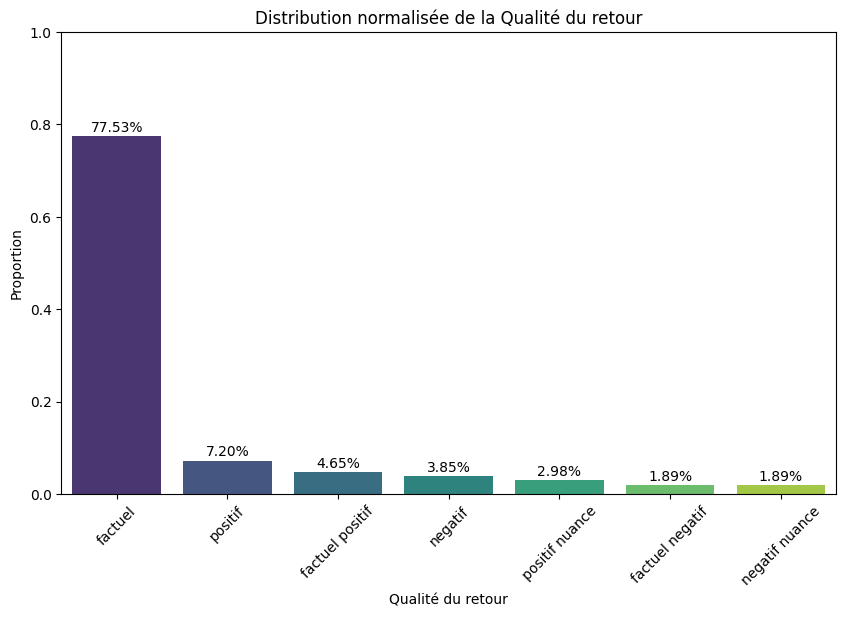

In [72]:
counts = df["Qualité du retour"].value_counts(normalize=True)

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Labels et titre
plt.xlabel("Qualité du retour")
plt.ylabel("Proportion")
plt.title("Distribution normalisée de la Qualité du retour")
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Affichage des proportions sur les barres
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=10)

# Affichage
plt.show()

In [73]:
df["sentiment"] = df["Qualité du retour"].apply(lambda x: "positif" if "positif" in x else ("negatif" if "negatif" in x else "neutre"))

df["factuel"] = df["Qualité du retour"].apply(lambda x: True if "factuel" in x else False)

df[["Qualité du retour", "sentiment", "factuel"]].head()


,Qualité du retour,sentiment,factuel
0,factuel,neutre,True
1,factuel,neutre,True
2,factuel negatif,negatif,True
3,negatif,negatif,False
4,factuel,neutre,True


C:\Users\Alex\AppData\Local\Temp\ipykernel_11736\1398466474.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis", ax=axes[0])
C:\Users\Alex\AppData\Local\Temp\ipykernel_11736\1398466474.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factuel_counts.index.astype(str), y=factuel_counts.values, palette="viridis", ax=axes[1])


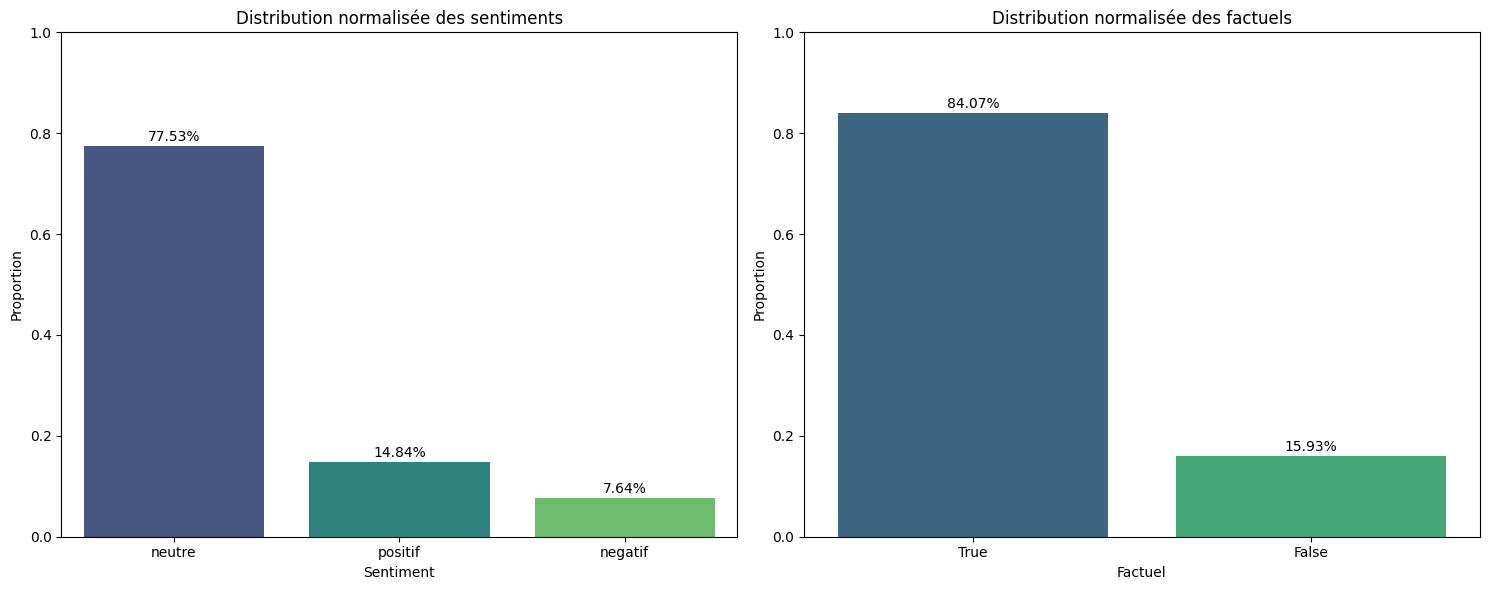

In [74]:
sentiment_counts = df["sentiment"].value_counts(normalize=True)

factuel_counts = df["factuel"].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis", ax=axes[0])
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Proportion")
axes[0].set_title("Distribution normalisée des sentiments")
axes[0].set_ylim(0, 1)

for i, v in enumerate(sentiment_counts.values):
    axes[0].text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=10)

sns.barplot(x=factuel_counts.index.astype(str), y=factuel_counts.values, palette="viridis", ax=axes[1])
axes[1].set_xlabel("Factuel")
axes[1].set_ylabel("Proportion")
axes[1].set_title("Distribution normalisée des factuels")
axes[1].set_ylim(0, 1)

for i, v in enumerate(factuel_counts.values):
    axes[1].text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [75]:
df.head()

,Date,Territoire,Sujet,Thème,Nbre d'article,Qualité du retour,Média,Articles,Qualité du retour2,Tonalité,sentiment,factuel
0,01/02/2023,Pas-de-Calais,Une maison à l'abandon détruite dans un incendie,divers,2.0,factuel,La voix du Nord,Une maison à l'abandon détruite dans un incend...,Factuel,factuel,neutre,True
1,01/02/2023,Pas-de-Calais,Trois familles relogés après un court-circuit,divers,1.0,factuel,La voix du Nord,Trois familles relogées après un court-circuit...,Factuel,factuel,neutre,True
2,01/02/2023,Nord,"Suite à une panne, 179 foyers privés de courant",reseau,1.0,factuel negatif,La voix du Nord,"Suite à une panne, 179 foyers privés de couran...",Factuel négatif,factuel négatif,negatif,True
3,01/02/2023,Pas-de-Calais,"Plus de coupures d'éléctricté, mais des dégâts...",reseau,2.0,negatif,La voix du Nord,"Plus de coupures d'électricité, mais des dégât...",Négatif,négatif,negatif,False
4,01/02/2023,Pas-de-Calais,Les décharges remplacés par deux centrales pho...,transition ecologique,1.0,factuel,La voix du Nord,les décharges remplacées par deux centrales\r...,Factuel,factuel,neutre,True


# Exporting the dataset cleaned

In [76]:
df = df.drop(columns=["Qualité du retour2", "Qualité du retour"])
df.to_csv('Data_cleaned.csv', index=False)